In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

  Obtaining dependency information for Pillow>=10.0.1 from https://files.pythonhosted.org/packages/0d/a9/1f4c54afaf2e689ba40b7688095bb70be8e84ec206c7dfe156c0645a0d52/pillow-10.2.0-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for torch>=1.8.0 from https://files.pythonhosted.org/packages/2a/27/cd2e60d4accf81aa6279be8c5e9bca99a16bd21b3c0428dc515569e36561/torch-2.1.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for torchvision>=0.9.0 from https://files.pythonhosted.org/packages/54/4b/b0861005f5d4370b3529f31d5e6461c4faf9bbbcbe916480cceebc885aa8/torchvision-0.16.2-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for ultralytics>=8.0.232 from https://files.pythonhosted.org/packages/6b/f6/5d5ffef34686a1e99f819a2cf91db7186def16c5b020fb6e1cb7766e968d/ultralytics-8.1.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.2 kB ? eta -:--

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.7 requires protobuf<4,>=3.11, but you have protobuf 4.25.1 which is incompatible.


In [25]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Hetul/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-21 Python-3.8.0 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [19]:
img = "https://ultralytics.com/images/bus.jpg"
result = model(img)
result


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1080x810 4 persons, 1 bus
Speed: 3148.0ms pre-process, 203.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 480)

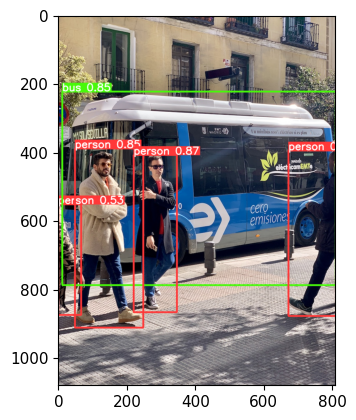

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [22]:
img = "https://images.unsplash.com/photo-1605602560252-2d23ec73d48a?w=1000&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8Y2FyJTIwcm9hZHxlbnwwfHwwfHx8MA%3D%3D"
result1 = model(img)
result1


YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 1250x1000 10 cars, 4 trucks
Speed: 1590.3ms pre-process, 203.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 512)

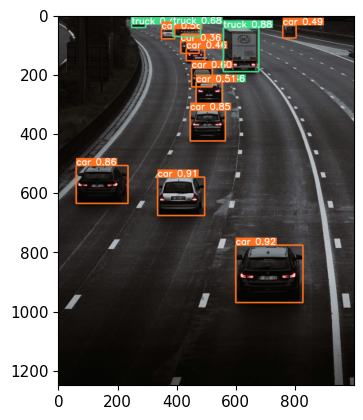

In [23]:
%matplotlib inline
plt.imshow(np.squeeze(result1.render()))
plt.show()

In [30]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()

In [12]:
import uuid
import os
import time

In [34]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_images = 30

In [36]:
cap = cv2.VideoCapture(0)

for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    for img_num in range(number_images):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret ,frame = cap.read()
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break;
cap.release()
cv2.destroyAllWindows()
    
    

In [4]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...


In [40]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Hetul\.labelmerc


In [5]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/86/65/3d582b968b9b6c3efdc4e54f36878d0b79c51af10ec7c9d02d08dd72314b/lxml-5.1.0-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB 435.7 kB/s eta 0:00:09
   ---------------------------------------- 0.0/3.9 MB 435.7 kB/s eta 0:00:09
   ---------------------------------------- 0.0/3.9 MB 435.7 kB/s eta 0:00:09
   ---------------------------------------- 0.0/3.9 MB 178.6 kB/s eta 0:00:22
    --------------------------------------- 0.1/3.9 MB 286.7 kB/s eta 0:00:14
    --------------------------------------- 0.1/3.9 MB 290.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/3.9 MB 290.5 kB/s eta 0:00:14
   - -------------------------------------- 0.1/3.9 MB 261.9 kB/s eta 0:00:15
   - ---------------------------------

In [18]:

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [28]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 200 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-278-g050c72c Python-3.8.0 torch-2.1.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

In [26]:
import torch
print(torch.cuda.is_available())

False


In [29]:
custom_model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp7/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Hetul/.cache\torch\hub\master.zip
YOLOv5  2024-1-22 Python-3.8.0 torch-2.1.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [10]:
# then test  any image

In [30]:
imag = os.path.join('data', 'images', 'awake.12d8ef23-b834-11ee-b7e0-2c3b706d641a.jpg')

In [31]:
result = custom_model(imag)

In [32]:
result.print()

image 1/1: 480x640 1 awake
Speed: 65.8ms pre-process, 219.3ms inference, 31.2ms NMS per image at shape (1, 3, 480, 640)


In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = custom_model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()

In [38]:
!python yolov5/export.py --weights yolov5/runs/train/exp7/weights/best.pt --img-size 640 --include pb


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(1, 640, 640, 3)]           0         []                            
                                                                                                  
 tf_conv (TFConv)            (1, 320, 320, 32)            3488      ['input_1[0][0]']             
                                                                                                  
 tf_conv_1 (TFConv)          (1, 160, 160, 64)            18496     ['tf_conv[0][0]']             
                                                                                                  
 tfc3 (TFC3)                 (1, 160, 160, 64)            18624     ['tf_conv_1[0][0]']           
                                                                                              

export: data=E:\Cmnd-line-gpu\Drowsiness_Detection_using_YOLO5\yolov5\data\coco128.yaml, weights=['yolov5/runs/train/exp7/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['pb']
YOLOv5  v7.0-278-g050c72c Python-3.8.0 torch-2.1.2+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from yolov5\runs\train\exp7\weights\best.pt with output shape (1, 25200, 22) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.13.0...

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1            

In [42]:
import subprocess

saved_model_dir = "yolov5/runs/train/exp7/weights/best.pb"
tflite_model_dir = "yolov5/runs/train/exp7/weights"

command = f"tflite_convert --saved_model_dir={saved_model_dir} --output_file={tflite_model_dir}/model.tflite"

subprocess.run(command, shell=True)


CompletedProcess(args='tflite_convert --saved_model_dir=yolov5/runs/train/exp7/weights/best.pb --output_file=yolov5/runs/train/exp7/weights/model.tflite', returncode=1)

In [47]:
import subprocess

saved_model_dir = "yolov5/runs/train/exp7/weights/best_saved_model/saved_model.pb"
tflite_model_dir = "yolov5/runs/train/exp7/weights/best_saved_model"

command = f"tflite_convert --saved_model_dir={saved_model_dir} --output_file={tflite_model_dir}/model.tflite"

subprocess.run(command, shell=True)


CompletedProcess(args='tflite_convert --saved_model_dir=yolov5/runs/train/exp7/weights/best_saved_model/saved_model.pb --output_file=yolov5/runs/train/exp7/weights/best_saved_model/model.tflite', returncode=1)

In [1]:
import subprocess

saved_model_dir = "yolov5/runs/train/exp7/weights/best_saved_model"
output_file = f"{saved_model_dir}/model.tflite"

command = f"tflite_convert --saved_model_dir={saved_model_dir}/saved_model.pb --output_file={output_file}"

subprocess.run(command, shell=True)


CompletedProcess(args='tflite_convert --saved_model_dir=yolov5/runs/train/exp7/weights/best_saved_model/saved_model.pb --output_file=yolov5/runs/train/exp7/weights/best_saved_model/model.tflite', returncode=1)

In [5]:
import tensorflow as tf

import os

saved_model_dir = "yolov5/runs/train/exp7/weights/best_saved_model"

# Check the contents of the directory
print(os.listdir(saved_model_dir))

# Rest of your code
tflite_model_path = "yolov5/runs/train/exp7/weights/best_saved_model/model.tflite"

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)



['assets', 'fingerprint.pb', 'saved_model.pb', 'variables']
